In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_high = pd.read_csv('High_RE_2030_efficiency1_dissipation0.5_value.csv')
df_mid = pd.read_csv('MidCase_2030_efficiency1_dissipation0.5_value.csv')
df_low = pd.read_csv('Low_RE_2030_efficiency1.25_dissipation0.5_value.csv')

In [5]:
# Combinar os datasets
df_combined = pd.concat([df_high, df_mid, df_low], ignore_index=True)

In [6]:
df_combined['local_datetime'] = pd.to_datetime(df_combined['local_datetime'], errors='coerce', utc=True)

In [7]:
# Criação de novas colunas para ano e mês
df_combined['year'] = df_combined['local_datetime'].dt.year
df_combined['month'] = df_combined['local_datetime'].dt.month

In [8]:
# Remover as colunas irrelevantes e com valores NaN e 0
df_combined = df_combined.drop(['local_orig_h', 'local_shift_to', 'max_post_shift', 'flex'], axis=1)

In [9]:
df_cleaned = df_combined.dropna()
# Remover linhas com valores 0 em qualquer coluna
df_cleaned = df_cleaned[(df_cleaned != 0).all(axis=1)]

In [10]:
df_cleaned.head(30)

,region,max_pre_shift,local_datetime,energy,capacity,shifting_value,spin,reg,total_profit,year,month
38503,AZNM,12.0,2030-06-29 03:00:00+00:00,4.087961,9.218094,13.306055,0.160700,0.057655,13.306055,2030,6
38505,AZNM,12.0,2030-07-01 03:00:00+00:00,0.101755,3.508876,3.610631,0.160599,0.058899,3.610631,2030,7
38514,AZNM,12.0,2030-07-10 03:00:00+00:00,-2.927637,3.666783,0.739146,0.159766,0.056679,0.739146,2030,7
38544,AZNM,12.0,2030-08-09 03:00:00+00:00,-2.964702,13.058011,10.093309,0.166551,0.056847,10.093309,2030,8
38545,AZNM,12.0,2030-08-10 03:00:00+00:00,-11.365569,23.368670,12.003101,0.148418,0.050607,12.003101,2030,8
38909,CAMX,12.0,2030-08-09 03:00:00+00:00,-2.957989,9.156791,6.198802,0.166929,0.056139,6.198802,2030,8
38910,CAMX,12.0,2030-08-10 03:00:00+00:00,-11.363185,15.576547,4.213362,0.151379,0.050991,4.213362,2030,8
38911,CAMX,12.0,2030-08-11 03:00:00+00:00,-15.112459,21.918456,6.805997,0.158970,0.053670,6.805997,2030,8
38912,CAMX,12.0,2030-08-12 03:00:00+00:00,-18.338677,18.581032,0.242354,0.004256,0.001442,0.242354,2030,8
38915,CAMX,12.0,2030-08-15 03:00:00+00:00,-15.142152,27.107618,11.965465,0.162539,0.055203,11.965465,2030,8


In [11]:
# Salvar o dataframe tratado
df_cleaned.to_csv('cleaned_energy_data.csv', index=False)

In [12]:
df_numerical = df_cleaned.select_dtypes(include=['float64', 'int64'])

In [13]:
corr = df_numerical.corr()

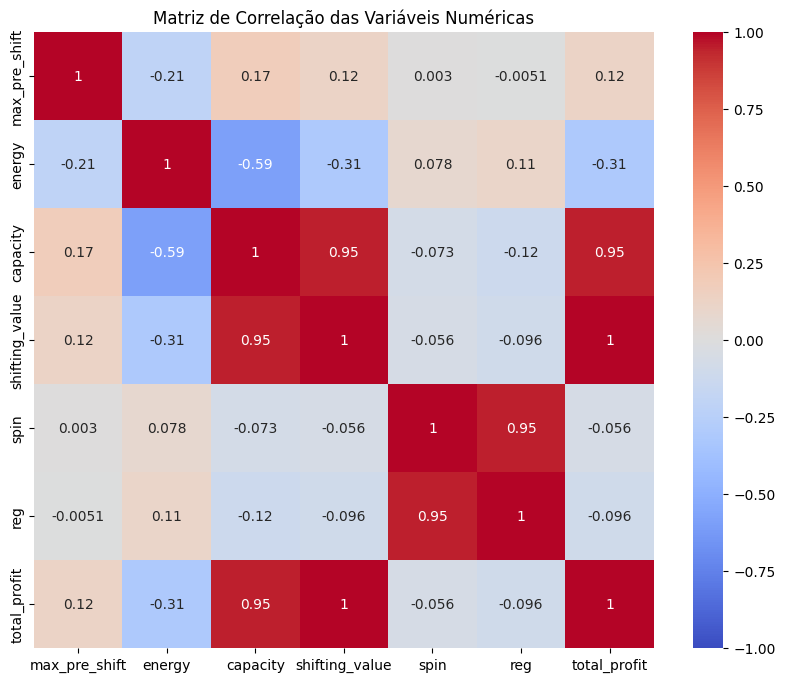

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [15]:
# Calcular eficiência energética (lucro por unidade de energia)
df_cleaned['efficiency'] = df_cleaned['total_profit'] / df_cleaned['energy']

In [16]:
df_cleaned.describe()

,max_pre_shift,energy,capacity,shifting_value,spin,reg,total_profit,year,month,efficiency
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,6.365036,-13.198904,63.785079,50.586175,0.053133,0.020259,50.586653,2030.003216,6.815989,12.899517
std,4.615127,25.057364,76.223617,64.724657,0.062569,0.023539,64.724284,0.056627,2.010748,607.362496
min,1.000000,-275.075379,-3.343535,0.002462,0.000083,0.000029,0.005259,2030.000000,1.000000,-1697.787735
25%,4.000000,-12.720928,11.226520,6.830291,0.007426,0.002652,6.830291,2030.000000,7.000000,-8.162374
50%,4.000000,-5.573518,34.400822,25.005203,0.016799,0.006628,25.005203,2030.000000,7.000000,-2.619367
75%,12.000000,-2.479459,88.216400,70.082339,0.111416,0.048407,70.082339,2030.000000,8.000000,-0.563858
max,12.000000,14.339950,612.658196,600.595817,0.207747,0.094670,600.595817,2031.000000,12.000000,21799.655763


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4353 entries, 38503 to 1655278
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   region          4353 non-null   object             
 1   max_pre_shift   4353 non-null   float64            
 2   local_datetime  4353 non-null   datetime64[ns, UTC]
 3   energy          4353 non-null   float64            
 4   capacity        4353 non-null   float64            
 5   shifting_value  4353 non-null   float64            
 6   spin            4353 non-null   float64            
 7   reg             4353 non-null   float64            
 8   total_profit    4353 non-null   float64            
 9   year            4353 non-null   int32              
 10  month           4353 non-null   int32              
 11  efficiency      4353 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(8), int32(2), object(1)
memory usage: 408.1+ KB


In [18]:
# Definir uma função para remover outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remover outliers de várias colunas
df_cleaned = remove_outliers_iqr(df_cleaned, 'energy')
df_cleaned = remove_outliers_iqr(df_cleaned, 'capacity')
df_cleaned = remove_outliers_iqr(df_cleaned, 'total_profit')

C:\Users\Dani\AppData\Local\Temp\ipykernel_27500\2387569710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='efficiency', data=df_cleaned, palette="Set2")


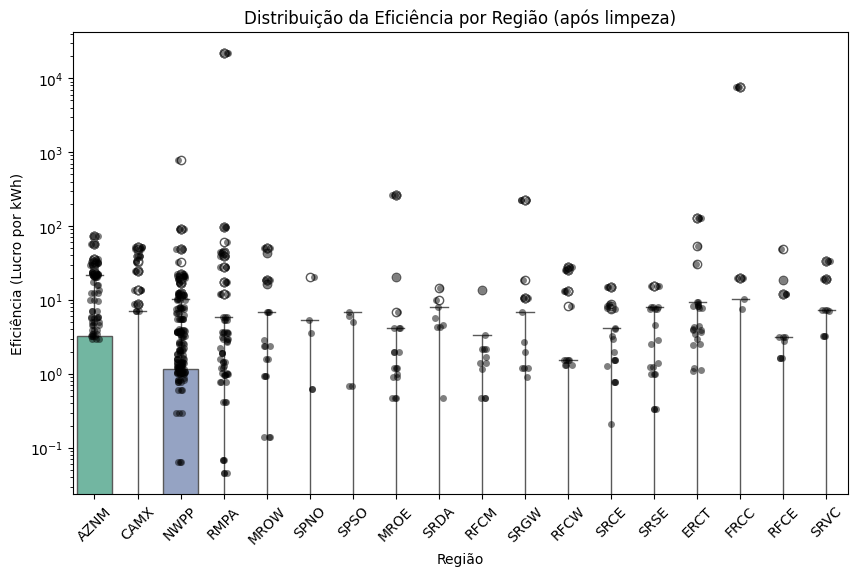

In [19]:
# Verificar a distribuição da eficiência por região

# Adicionar uma linha de referência para a mediana geral
median_efficiency = df_cleaned['efficiency'].median()


plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='efficiency', data=df_cleaned, palette="Set2")
plt.yscale('log')  # Usar escala logarítmica no eixo Y
sns.stripplot(x='region', y='efficiency', data=df_cleaned, color='black', alpha=0.5)
plt.axhline(median_efficiency, color='red', linestyle='--', label=f'Mediana Geral: {median_efficiency:.2f}')
plt.title('Distribuição da Eficiência por Região (após limpeza)')
plt.xlabel('Região')
plt.ylabel('Eficiência (Lucro por kWh)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Dani\AppData\Local\Temp\ipykernel_27500\3635149441.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='efficiency', data=df_region_efficiency, palette=palette)


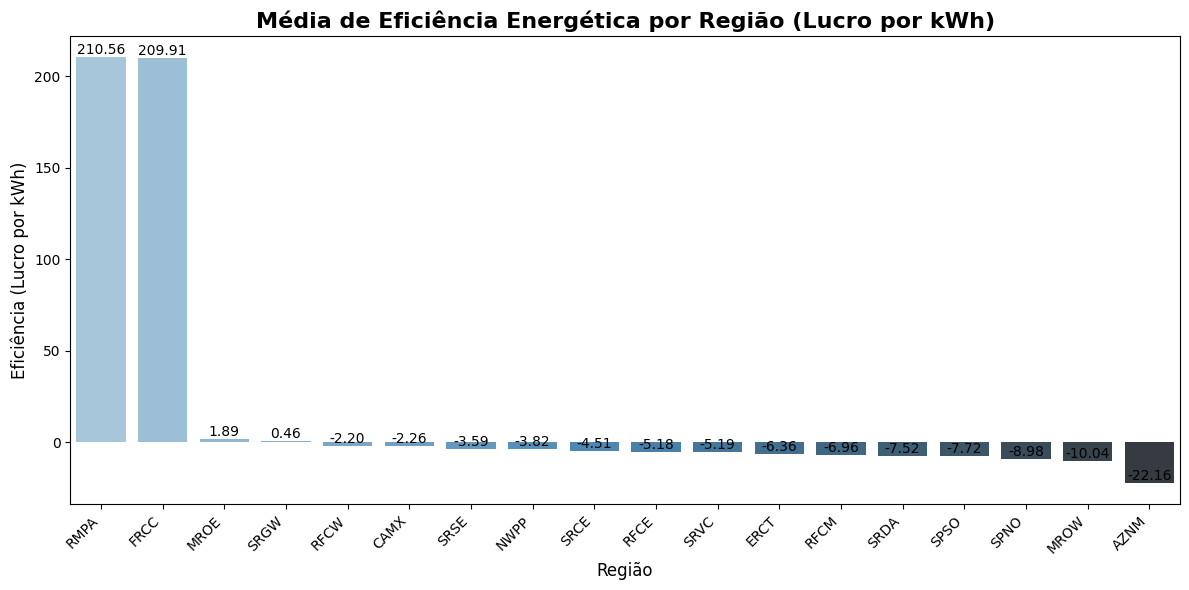

In [20]:
# Ordenar as regiões pela média de eficiência
df_region_efficiency = df_cleaned.groupby('region')['efficiency'].mean().reset_index()
df_region_efficiency = df_region_efficiency.sort_values(by='efficiency', ascending=False)

# Definir uma paleta de cores personalizada
palette = sns.color_palette("Blues_d", len(df_region_efficiency))

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='efficiency', data=df_region_efficiency, palette=palette)

# Adicionar anotações para os valores de eficiência
for index, value in enumerate(df_region_efficiency['efficiency']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Melhorar os títulos e rótulos
plt.title('Média de Eficiência Energética por Região (Lucro por kWh)', fontsize=16, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Eficiência (Lucro por kWh)', fontsize=12)

# Rotacionar os rótulos das regiões para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


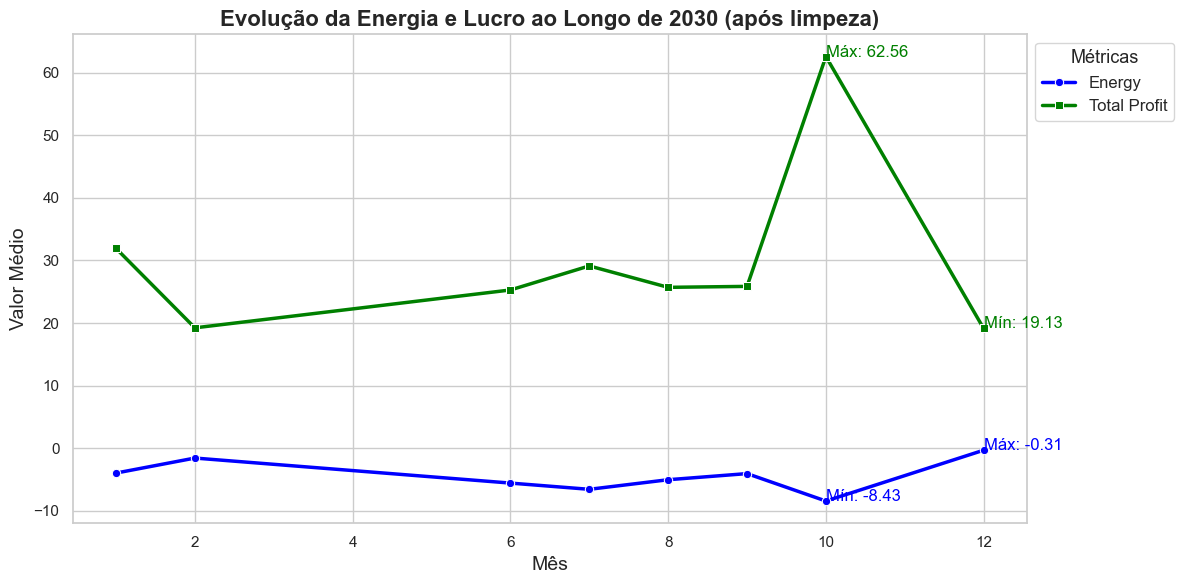

In [21]:
df_monthly = df_cleaned.groupby('month')[['energy', 'total_profit']].mean().reset_index()

# Configurações de estilo
sns.set(style="whitegrid")

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))

# Plotar energia
sns.lineplot(x='month', y='energy', data=df_monthly, marker='o', label='Energy', color='blue', linewidth=2.5)
# Plotar lucro total
sns.lineplot(x='month', y='total_profit', data=df_monthly, marker='s', label='Total Profit', color='green', linewidth=2.5)

# Adicionar títulos e rótulos aprimorados
plt.title('Evolução da Energia e Lucro ao Longo de 2030 (após limpeza)', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor Médio', fontsize=14)

# Destacar os valores máximos e mínimos
max_energy = df_monthly['energy'].max()
min_energy = df_monthly['energy'].min()
max_profit = df_monthly['total_profit'].max()
min_profit = df_monthly['total_profit'].min()

# Anotação para energia
plt.text(df_monthly['month'][df_monthly['energy'].idxmax()], max_energy, f'Máx: {max_energy:.2f}', 
         horizontalalignment='left', color='blue', fontsize=12)
plt.text(df_monthly['month'][df_monthly['energy'].idxmin()], min_energy, f'Mín: {min_energy:.2f}', 
         horizontalalignment='left', color='blue', fontsize=12)

# Anotação para lucro
plt.text(df_monthly['month'][df_monthly['total_profit'].idxmax()], max_profit, f'Máx: {max_profit:.2f}', 
         horizontalalignment='left', color='green', fontsize=12)
plt.text(df_monthly['month'][df_monthly['total_profit'].idxmin()], min_profit, f'Mín: {min_profit:.2f}', 
         horizontalalignment='left', color='green', fontsize=12)

# Melhorar a legenda
plt.legend(title='Métricas', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [22]:
# Verificar o dataset após a remoção de outliers
print(df_cleaned.describe())


       max_pre_shift       energy     capacity  shifting_value         spin  \
count    3433.000000  3433.000000  3433.000000     3433.000000  3433.000000   
mean        5.964754    -5.500474    33.110651       27.610177     0.054647   
std         4.639471     6.579262    31.342324       28.750588     0.063549   
min         1.000000   -27.951443    -3.343535        0.002462     0.000083   
25%         1.000000    -6.868063     8.185798        4.886881     0.007438   
50%         4.000000    -3.369903    21.479174       15.523853     0.017418   
75%        12.000000    -1.697951    50.574754       43.210815     0.122934   
max        12.000000    11.773757   138.797582      115.322019     0.207747   

               reg  total_profit         year        month    efficiency  
count  3433.000000   3433.000000  3433.000000  3433.000000   3433.000000  
mean      0.021200     27.610784  2030.004078     6.822022     19.574896  
std       0.024176     28.750008     0.063739     2.060581    6

In [23]:
file_path = 'D:\Pastas\Infnet\Infnet - 2024.2\Projeto de bloco\TP1\Dados_abertos_Consumo_Mensal.xlsx'

In [24]:
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names 

In [25]:
data_frames = {sheet: pd.read_excel(xls, sheet_name=sheet) for sheet in sheet_names}



In [28]:
for sheet_name, df in data_frames.items():
    print(f"Explorando a planilha: {sheet_name}\n")
    
    # Mostrar as primeiras linhas
    print("Primeiras linhas:")
    print(df.head(), "\n")
    
    # Mostrar as últimas linhas
    print("Últimas linhas:")
    print(df.tail(), "\n")
    
    # Resumo estatístico
    print("Resumo estatístico:")
    print(df.describe(), "\n")
    
    # Informações sobre os tipos de dados
    print("Informações dos dados:")
    print(df.info(), "\n")
    
    # Contagem de valores únicos
    print("Valores únicos por coluna:")
    unique_counts = {col: df[col].nunique() for col in df.columns}
    print(unique_counts, "\n\n")


Explorando a planilha: CONSUMO E NUMCONS SAM

Primeiras linhas:
       Data  DataExcel        Regiao                   Sistema      Classe  \
0  20240801 2024-08-01  Centro-Oeste  SUDESTE / CENTRO - OESTE   Comercial   
1  20240801 2024-08-01  Centro-Oeste  SUDESTE / CENTRO - OESTE   Comercial   
2  20240801 2024-08-01  Centro-Oeste  SUDESTE / CENTRO - OESTE  Industrial   
3  20240801 2024-08-01  Centro-Oeste  SUDESTE / CENTRO - OESTE  Industrial   
4  20240801 2024-08-01  Centro-Oeste  SUDESTE / CENTRO - OESTE      Outros   

  TipoConsumidor     Consumo  Consumidores  
0         Cativo  420910.578      503275.0  
1          Livre  200873.852        2244.0  
2         Cativo   93217.614       31383.0  
3          Livre  948142.657         967.0  
4         Cativo  329593.825       63241.0   

Últimas linhas:
           Data  DataExcel Regiao Sistema       Classe TipoConsumidor  \
16811  20040101 2004-01-01    Sul     SUL   Industrial         Cativo   
16812  20040101 2004-01-01    Sul

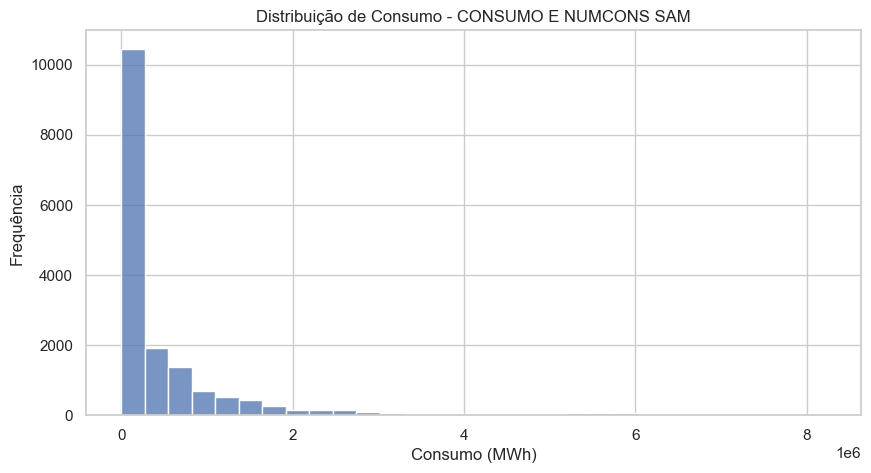

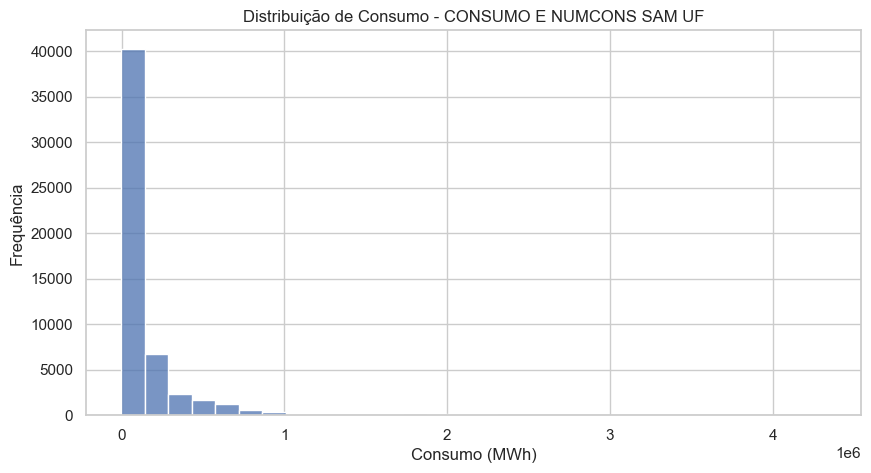

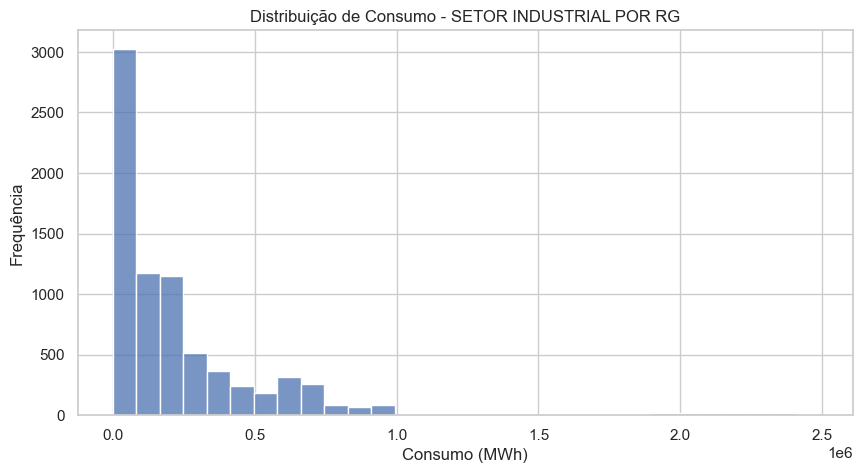

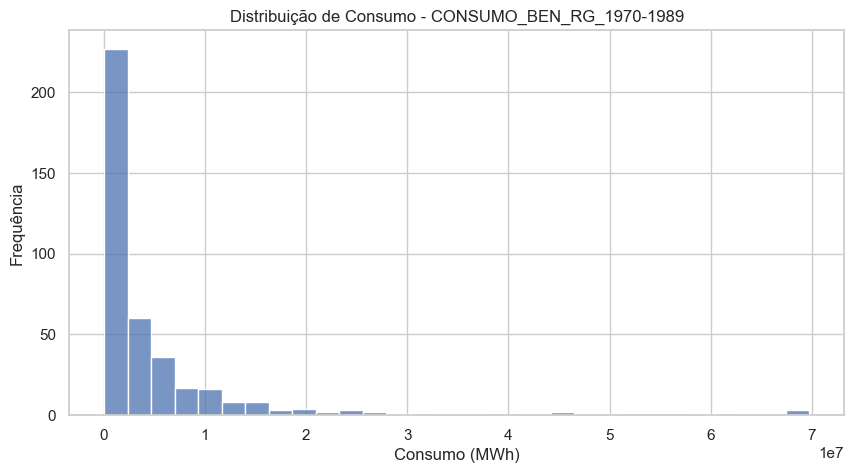

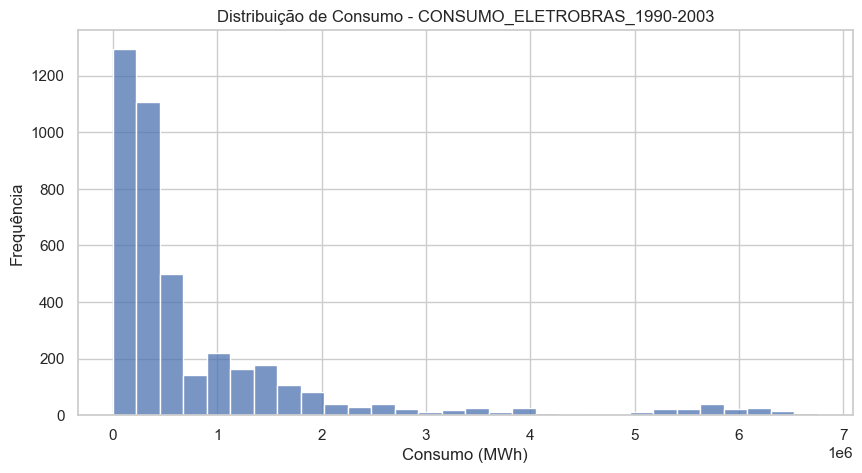

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

for sheet_name, df in data_frames.items():
    if 'Consumo' in df.columns:  # Supondo que 'Consumo' seja uma coluna comum
        plt.figure(figsize=(10, 5))
        sns.histplot(df['Consumo'], bins=30)
        plt.title(f'Distribuição de Consumo - {sheet_name}')
        plt.xlabel('Consumo (MWh)')
        plt.ylabel('Frequência')
        plt.show()
